In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/processed_tweet.csv")

# Calculate TF-IDF

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
df = df[df["text"].notnull()]
idx = df.index
df.reset_index(drop=True, inplace=True)

In [5]:
text = df["text"]
vectoriser = TfidfVectorizer(max_df=0.9, min_df=10, stop_words='english')
matrix = vectoriser.fit_transform(text)

In [6]:
matrix.shape

(6436, 1046)

# Use Cosine Similarity to get a Similarity Matrix

In [15]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(matrix.toarray())

In [17]:
similarity_matrix

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0743256 ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.04688231,
        0.06429945],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.05753522],
       [0.        , 0.04688231, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.0743256 , 0.06429945, 0.        , ..., 0.05753522, 0.        ,
        1.        ]])

# Find Best K for KMeans Clustering

## Elbow Method

In [18]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

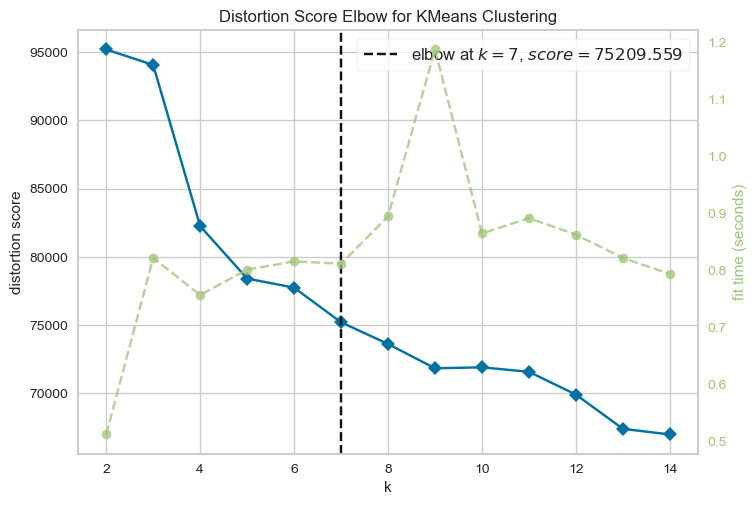

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
visualizer = KElbowVisualizer(KMeans(random_state=2043), k=(2, 15))  # k=(2, 15) means it will test clusters from 2 to 15
visualizer.fit(similarity_matrix)  # Fit the data (TF-IDF matrix)
visualizer.show()  # Display the elbow plot

## Silhouette Score

In [22]:
from sklearn.metrics import silhouette_score

In [24]:
k_values = range(2, 10)
silhouette_scores = []
best_k = None
best_silhouette_score = -1

for k in k_values:
    km = KMeans(n_clusters=k, init="k-means++", n_init=10,
                max_iter=100, random_state=2043)
    km.fit(matrix_pca)
    
    silhouette_avg = silhouette_score(similarity_matrix, km.labels_)
    silhouette_scores.append(silhouette_avg)
    
    if silhouette_avg > best_silhouette_score:
        best_k = k
        best_silhouette_score = silhouette_avg

print("Best K value:", best_k)
print("Best Silhouette Score:", best_silhouette_score)

Best K value: 2
Best Silhouette Score: 0.3139794465407897


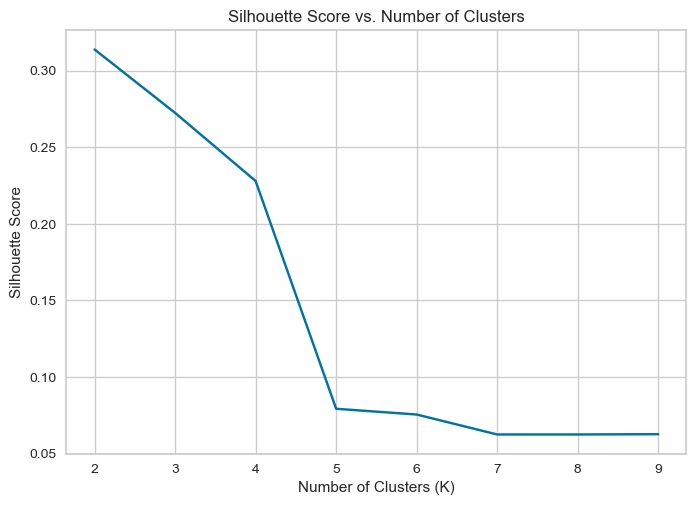

In [25]:
plt.plot(k_values, silhouette_scores)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()

In [38]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=2043)
kmeans.fit(matrix)

df['theme'] = kmeans.labels_

In [39]:
# Raw Data
tweets = pd.read_csv("data/tweets.csv")
tweets = tweets.loc[idx].reset_index(drop=True)
tweets["theme"] = df["theme"]

for i in range(n_clusters):
    tweet_theme = tweets[tweets["theme"] == i]
    tweet_theme.to_csv(f"data/themes/cosine_theme_{i}.csv", index=False)